# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Rika Maulidia Fitri
- **Email:** m599b4kx3860@bangkit.academy
- **ID Dicoding:** 10918974

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan waktu dalam sehari?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

print("Data dari 'day.csv':")
print(df_day.head())

print("\nData dari 'hour.csv':")
print(df_hour.head())

Data dari 'day.csv':
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data

**Insight:**
- Data dikumpulkan dari dua file CSV, day.csv dan hour.csv, yang masing-masing berisi data penggunaan sepeda berdasarkan hari dan jam.
- Beberapa baris pertama dari kedua dataset tersebut ditampilkan menggunakan fungsi head() untukmemahami struktur data dan memeriksa informasi awal yang ada.

### Assessing Data

In [ ]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

df_day.info()
df_hour.info()

print(df_day.isnull().sum())
print(df_hour.isnull().sum())

df_day.describe()
df_hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
duplicate_rows_day = df_day[df_day.duplicated()]
duplicate_rows_hour = df_hour[df_hour.duplicated()]

print("Duplicate rows in 'day.csv':")
print(duplicate_rows_day)

print("\nDuplicate rows in 'hour.csv':")
print(duplicate_rows_hour)

Duplicate rows in 'day.csv':
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

Duplicate rows in 'hour.csv':
Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [ ]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

q1_day = df_day[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.25)
q3_day = df_day[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.75)
iqr_day = q3_day - q1_day

outlier_day = (df_day[['temp', 'hum', 'windspeed', 'cnt']] < (q1_day - 1.5 * iqr_day)) | (df_day[['temp', 'hum', 'windspeed', 'cnt']] > (q3_day + 1.5 * iqr_day))
outlier_count_day = outlier_day.sum()
total_outlier_day = outlier_day.values.sum()


q1_hour = df_hour[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.25)
q3_hour = df_hour[['temp', 'hum', 'windspeed', 'cnt']].quantile(0.75)
iqr_hour = q3_hour - q1_hour

outlier_hour = (df_hour[['temp', 'hum', 'windspeed', 'cnt']] < (q1_hour - 1.5 * iqr_hour)) | (df_hour[['temp', 'hum', 'windspeed', 'cnt']] > (q3_hour + 1.5 * iqr_hour))
outlier_count_hour = outlier_hour.sum()
total_outlier_hour = outlier_hour.values.sum()


print("Outlier Count for day.csv:")
print(outlier_count_day)
print("\nTotal Outlier Count for day.csv:")
print(total_outlier_day)

print("\nOutlier Count for hour.csv:")
print(outlier_count_hour)
print("\nTotal Outlier Count for hour.csv:")
print(total_outlier_hour)

Outlier Count for day.csv:
temp          0
hum           2
windspeed    13
cnt           0
dtype: int64

Total Outlier Count for day.csv:
15

Outlier Count for hour.csv:
temp           0
hum           22
windspeed    342
cnt          505
dtype: int64

Total Outlier Count for hour.csv:
869


**Insight:**
- Dataset day.csv dan hour.csv dimuat, dan struktur data dievaluasi menggunakan info() untuk melihat tipe data dan nilai kosong.
-  Duplikasi baris diperiksa menggunakan duplicate() dan hasilnya ditampilkan.
- Outlier dihitung menggunakan metode IQR untuk kolom temp, hum, windspeed, dan cnt. Jumlah outlier dihitung dan ditampilkan untuk kedua dataset.

### Cleaning Data

In [ ]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')

df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_day[categorical_columns] = df_day[categorical_columns].astype('category')
df_hour[categorical_columns] = df_hour[categorical_columns].astype('category')

df_day = df_day.drop_duplicates()
df_hour = df_hour.drop_duplicates()

df_day = df_day[np.abs(df_day['temp'] - df_day['temp'].mean()) <= (3 * df_day['temp'].std())]
df_hour = df_hour[np.abs(df_hour['temp'] - df_hour['temp'].mean()) <= (3 * df_hour['temp'].std())]

df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

**Insight:**
- Data di muat dalam kolom dteday diubah ke format datetime.
- Kolom kategorikal diubah menjadi tipe category untuk menghemat memori.
- Baris duplikat dihapus, dan nilai temp yang merupakan outler dihapus dari dataset

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df_day.info()
df_hour.info()

print(df_day.isnull().sum())
print(df_hour.isnull().sum())

df_day.describe()
df_hour.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Struktur dataset day.csv dan hour.csv diperiksa dengan info()
- Nilai hilang ditelusuri dengan isnull().sum(), dan statistik deskriptif diperoleh melalui describe()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


Text(95.72222222222221, 0.5, 'Hour of the Day')

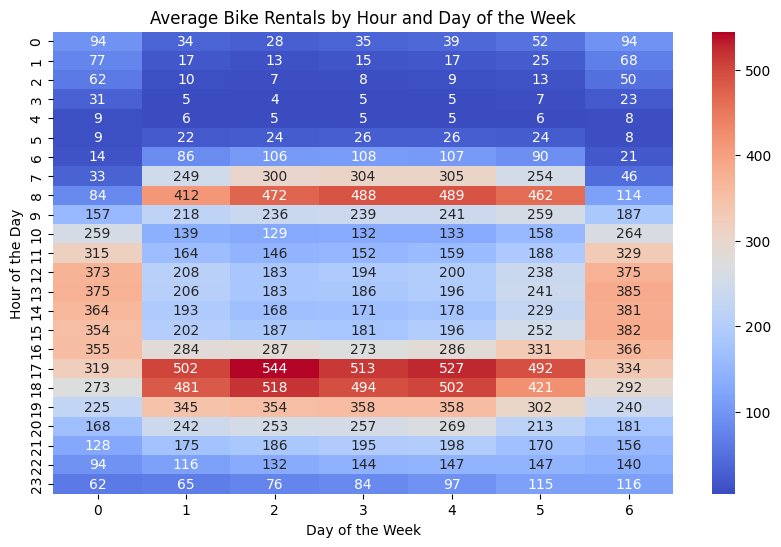

In [ ]:
df = pd.read_csv('hour.csv')

houlry_rentals = df.groupby('hr')['cnt'].mean()

print(houlry_rentals)

usage_by_hour_day = df.pivot_table(values='cnt', index='hr', columns='weekday', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(usage_by_hour_day, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average Bike Rentals by Hour and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')

### Pertanyaan 2:

               temp       hum  windspeed       cnt
temp       1.000000 -0.069881  -0.023125  0.404772
hum       -0.069881  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.290105   1.000000  0.093234
cnt        0.404772 -0.322911   0.093234  1.000000


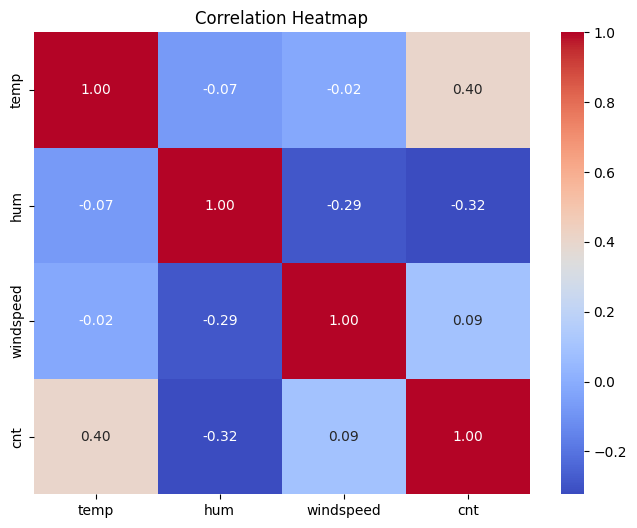

In [ ]:
correclation = df[['temp', 'hum', 'windspeed', 'cnt']].corr()

print(correclation)

plt.figure(figsize=(8, 6))
sns.heatmap(correclation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Insight:**
- Analisis dilakukan untuk mengidentifikasi pola penggunaan sepeda berdasarkan waktu dengan menghitung rata-ratapenyewaan per jam dan menyajikan dalam heatmap.
- Analisis korelasi  dilakukan untuk menilai pengaruh kondisis cuaca terhadap jumlah penyewaan sepeda, dengan hasil ditampilkan dalam heatmap korelasi.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Penggunaan sepeda memiliki pola yang berbeda-beda antara hari kerja dan akhir pekan. Pada hari kerja, terdapat puncak penggunaan di pagi dan sore hari, menjelaskan perjalanan ke dan dari tempat kerja atau sekolah. Sementara itu, pada akhir pekan, penggunaan lebih merata sepanjang hari, dengan peningkatan di sisang hari, menjelaskan penggunaan untuk rekreasi. Penggunaan sepeda sangat rendah pada malam hari di kedua kategotri.
- Conclution pertanyaan 2 : Cuaca yang baik meningkatkan penggunaan sepeda, terutama pada suhu yang lebih hangat dan cuaca cerah. Sebaliknya, kelembapan tinggi, angin kencang, dan cuaca yang buruk seperti hujan atau badai, menurunkan jumlah peminjaman sepeda. Cuaca buruk secara signifikan menghambat aktifitas bersepeda, sementara cuaca yang nyaman mendukungnya.